### What is Linear Regression?

 Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:

### There are number of assumptions of a linear regression model. In modeling, we normally check for five of the assumptions. These are as follows :

1. Relationship between the outcomes and the predictors is linear.
2. Error term  has mean almost equal to zero for each value of outcome.
3. Error term  has constant variance.
4. Errors are uncorrelated.
5. Errors are normally distributed or we have an adequate sample size to rely on large sample theory.

The point to be noted here is that none of these assumptions can be validated by R-square chart, F-statistics or any other model accuracy plots. On the other hand, if any of the assumptions are violated, chances are high that accuracy plot can give misleading results.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('C:/Users/Akshat/Desktop/Data/cruise.csv')

In [5]:
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [6]:
data.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [7]:
data.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

In [8]:
data.shape

(158, 9)

In [12]:
dummy=pd.get_dummies(data['Cruise_line']) # converting string variable into numeric

In [27]:
new_data=pd.merge(data,dummy,left_index=True,right_index=True)

In [29]:
new_data.head(2)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Azamara,...,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,1,...,0,0,0,0,0,0,0,0,0,0
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
new_data=new_data.drop(['Ship_name','Cruise_line'],axis=1) # dropping not required columns from our new dataframe

In [32]:
new_data.head(2)

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Azamara,Carnival,Celebrity,...,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Y=new_data['crew']

In [35]:
X = new_data[new_data.columns.difference(['crew'])] # creating dataframe with all columns except crew

,Age,Azamara,Carnival,Celebrity,Costa,Crystal,Cunard,Disney,Holland_American,MSC,...,Royal_Caribbean,Seabourn,Silversea,Star,Tonnage,Windstar,cabins,length,passenger_density,passengers
0,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,30.277,0,3.55,5.94,42.64,6.94
1,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,30.277,0,3.55,5.94,42.64,6.94


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [37]:
X_train.shape

(110, 26)

In [39]:
X_test.shape

(48, 26)

In [96]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

In [97]:
predictions=model.predict(X_test)

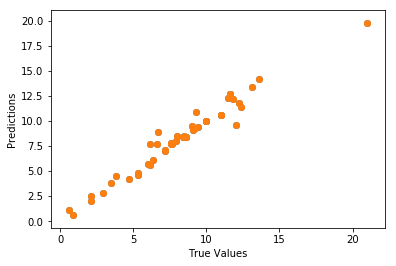

In [45]:
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))

Variance score: 0.96


In [50]:
model.intercept_

-1.4376872615717273

In [53]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Mean squared error: 0.55


In [55]:
model.coef_

array([  1.07840726e-03,  -1.46967502e-01,   5.34185561e-01,
         5.28679362e-01,  -4.95455069e-01,  -1.45676988e-01,
        -2.42753008e-02,   5.64228241e-01,  -6.19268177e-01,
        -2.16916625e-01,   4.44658835e-01,   3.58841888e-01,
         3.33066907e-16,  -1.80816590e-01,  -6.72841712e-02,
         2.81326825e-01,  -1.17662096e+00,   1.62714201e-01,
        -9.68633313e-02,   8.54287278e-01,   1.90813666e-02,
        -5.58777475e-01,   5.53970694e-01,   4.77683787e-01,
         1.59603004e-03,  -4.63450427e-02])

In [56]:
Y_test.describe() # compared to the mean and the standard deviation, our model mse is low

count    48.000000
mean      8.220833
std       3.726292
min       0.590000
25%       6.162500
50%       8.460000
75%      10.250000
max      21.000000
Name: crew, dtype: float64

### cross-validation to check if the mse is sue to training and test split issue

In [64]:
from sklearn.model_selection import cross_val_score
clf=linear_model.LinearRegression()
scores = cross_val_score(clf, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-scores)

array([ 0.91995336,  0.57524268,  0.51209934,  0.60691126,  0.84263373,
        1.36527193,  2.19255128,  0.57809582,  0.69807329,  0.72722957])

### using RFE to identify significant variables

In [87]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True False  True  True  True  True  True  True
 False  True False  True  True  True  True  True False  True  True  True
 False False]
[8 3 1 1 1 4 1 1 1 1 1 1 9 1 2 1 1 1 1 1 6 1 1 1 7 5]


C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
b=X.columns
a=rfe.support_
c=pd.DataFrame(a,index=b)
c=c[c[0]==True]
c.index

Index(['Carnival', 'Celebrity', 'Costa', 'Cunard', 'Disney',
       'Holland_American', 'MSC', 'Norwegian', 'Oceania', 'P&O',
       'Regent_Seven_Seas', 'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star',
       'Windstar', 'cabins', 'length'],
      dtype='object')

In [94]:
newX=X[['Carnival', 'Celebrity', 'Costa', 'Cunard', 'Disney',
       'Holland_American', 'MSC', 'Norwegian', 'Oceania', 'P&O',
       'Regent_Seven_Seas', 'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star',
       'Windstar', 'cabins', 'length']]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(newX, Y, test_size=0.30, random_state=42)

In [105]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [106]:
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))

Variance score: 0.96


In [99]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Mean squared error: 0.59


### Using statsmodel to check Adj R2, and we see that it grows to 98.6%

In [107]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     430.7
Date:                Sun, 08 Apr 2018   Prob (F-statistic):           1.45e-80
Time:                        01:26:22   Log-Likelihood:                -144.72
No. Observations:                 110   AIC:                             325.4
Df Residuals:                      92   BIC:                             374.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Carnival              0.2988      0.339      0.881      0.381      -0.375       0.972
Celebrity             0.4467      0.497      0.898      0.371      -0.541       1.435
Costa                -0.7162      0.397     -1.804      0.075      -1.505       0.072
Cunard                0.6202      0.642      0.966      0.336      -0.654       1.895
Disney                1.0570      1.033      1.023      0.309      -0.995       3.109
Holland_American     -0.6266      0.387     -1.620      0.109      -1.395       0.142
MSC                  -0.4998      0.463     -1.080      0.283      -1.419       0.420
Norwegian             0.1241      0.408      0.304      0.762      -0.686       0.935
Oceania               0.1450      0.628      0.231      0.818      -1.102       1.392
P&O                  -0.1543      0.624     -0.247      0.805      -1.393       1.084
Regent_Seven_Seas     0.3837      0.588      0.652      0.516      -0.784       1.552
Royal_Caribbean      -1.3279      0.382     -3.480      0.001      -2.086      -0.570
Seabourn             -0.2583      0.628     -0.411      0.682      -1.506       0.989
Silversea            -0.1912      0.765     -0.250      0.803      -1.711       1.329
Star                  0.1302      0.590      0.221      0.826      -1.042       1.303
Windstar             -0.8259      0.768     -1.075      0.285      -2.352       0.700
cabins                0.6678      0.054     12.372      0.000       0.561       0.775
length                0.2645      0.072      3.680      0.000       0.122       0.407
==============================================================================
Omnibus:                      125.320   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2845.149
Skew:                           3.829   Prob(JB):                         0.00
Kurtosis:                      26.709   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model.pvalues

Carnival             3.805974e-01
Celebrity            3.714840e-01
Costa                7.454532e-02
Cunard               3.363609e-01
Disney               3.089078e-01
Holland_American     1.086847e-01
MSC                  2.830757e-01
Norwegian            7.617364e-01
Oceania              8.178173e-01
P&O                  8.051069e-01
Regent_Seven_Seas    5.157657e-01
Royal_Caribbean      7.675671e-04
Seabourn             6.817639e-01
Silversea            8.032291e-01
Star                 8.259355e-01
Windstar             2.853381e-01
cabins               2.789837e-21
length               3.925034e-04
dtype: float64

In [69]:
 import seaborn as sns; sns.set(color_codes=True)

In [102]:
Y_train=pd.DataFrame(Y_train)

In [103]:
c=['crew']
Y_train.columns=c

In [82]:
Y_test=pd.DataFrame(Y_test)
#c=['crew']
Y_test.columns=c

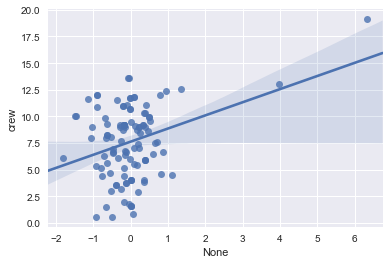

In [104]:
%matplotlib inline
sns.regplot(x=model.resid, y='crew', data=Y_train)


In [109]:
table=pd.read_csv('C:/Users/Akshat/Desktop/Data/bottle.csv')
table.head(3)

C:\Users\Akshat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
table.shape

(864863, 74)

In [118]:
table.dropna(axis=0,how='all')

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.450,33.4310,NaN,25.65100,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.450,33.4400,NaN,25.65800,NaN,...,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.240,33.4240,NaN,25.68200,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.060,33.4200,NaN,25.71000,NaN,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.860,33.4940,NaN,25.80100,NaN,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
table.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

In [121]:
table.dtypes[1]

dtype('int64')

## to identify if we can use fill na with mean or 0

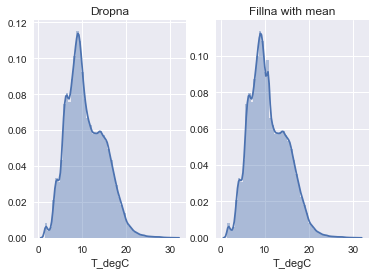

In [122]:
fig, ax=plt.subplots(1,2)
sns.distplot(table.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(table.T_degC.fillna(table.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [125]:
## looks like we can modify na values with fill na

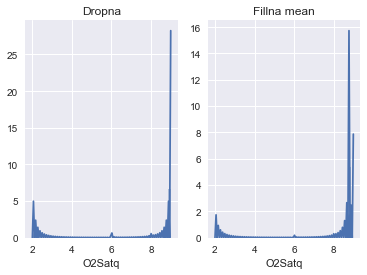

In [123]:
from scipy import stats
fig, ax=plt.subplots(1,2)
sns.distplot(table.O2Satq.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(table.O2Satq.fillna(table.O2Satq.mean()), ax=ax[1])
ax[1].set_title("Fillna mean")

In [126]:
## their scaling is different, so using box cox transform

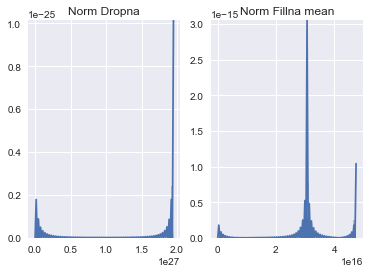

In [124]:
normalized_ox_dropna = stats.boxcox(table.O2Satq.dropna())[0]
# normalize oxygen sat (w/ Box-Cox)
normalized_ox_fillna = stats.boxcox(table.O2Satq.fillna(table.O2Satq.mean()))[0]

fig, ax=plt.subplots(1,2)
sns.distplot(normalized_ox_dropna, ax=ax[0])
ax[0].set_title("Norm Dropna")
sns.distplot(normalized_ox_fillna, ax=ax[1])
ax[1].set_title("Norm Fillna mean")